# Problem 1 Bootstrap Method

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw_data = np.loadtxt("fiji.txt")
head = ["latitude", "longitude", "depth", "magnitude", "number of reporting"]
data = pd.DataFrame(raw_data[:,1:], index=pd.Series(raw_data[:,0]).astype("int32"), columns=head)
data.head()

,latitude,longitude,depth,magnitude,number of reporting
1,-20.42,181.62,562.0,4.8,41.0
2,-20.62,181.03,650.0,4.2,15.0
3,-26.00,184.10,42.0,5.4,43.0
4,-17.97,181.66,626.0,4.1,19.0
5,-20.42,181.96,649.0,4.0,11.0


### (a)

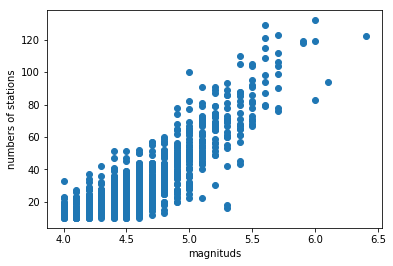

In [11]:
X = np.array(data["magnitude"])
Y = np.array(data["number of reporting"])

plt.scatter(x=X, y=Y)
plt.xlabel("magnituds")
plt.ylabel("numbers of stations")
plt.show()

### (b)

The plug-in estimate of the correlation coefficient between X and Y is given by

$\hat \theta = r_{X,Y}=\frac{S_{X,Y}}{S_X S_Y} = \frac{\sum_{i=1}^n (X_i - \bar X)(Y_i - \bar Y)}{\sqrt{\sum_{i=1}^n (X_i - \bar X)^2}\sqrt{\sum_{i=1}^n (Y_i - \bar Y)^2}} = 0.8512$

In [44]:
theta_hat = np.corrcoef(X,Y)[0,1]
print("r(X,Y) =", theta_hat)

r(X,Y) = 0.851182422372


### (c)

$\hat{\text{se}}_B[\hat\theta]= 0.0102$

In [127]:
B = 1000
theta_hat_B = []
for b in range(B):
    data_B = data.sample(n=len(data), replace=True)
    X_B, Y_B = data_B["magnitude"], data_B["number of reporting"]
    theta_hat_B.append(np.corrcoef(X_B, Y_B)[0,1])
theta_hat_B = np.array(theta_hat_B)    

In [128]:
se_theta_hat_B = theta_hat_B.std()
print("The bootstrap standard error of theta is", se_theta_hat_B)

The bootstrap standard error of theta is 0.0101591808056


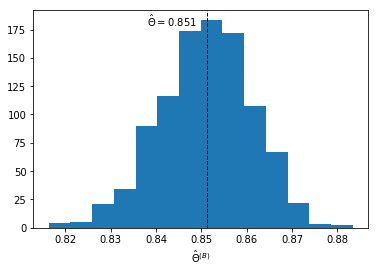

In [135]:
plt.hist(theta_hat_B, bins=14)
plt.xlabel("$\hat\Theta^{(B)}$")
plt.text(0.838,178, "$\hat\Theta=0.851$")

plt.axvline(theta_hat, color='k', linestyle='dashed', linewidth=1)
plt.show()

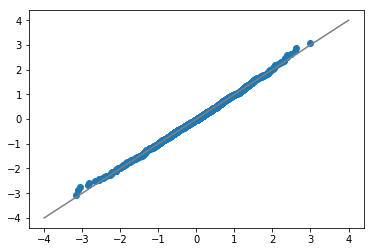

In [97]:
QQ_X = np.sort((np.array(theta_hat_B) - np.array(theta_hat_B).mean()) / np.array(theta_hat_B).std())

from scipy.stats import norm
index = np.array([i for i in range(1,len(QQ_X)+1)])
QQ_Y = sp.stats.norm.ppf(index/(len(QQ_X)+1))

plt.plot([-4,4],[-4,4],c="grey")
plt.scatter(QQ_X,QQ_Y)
plt.show()

### (d)

The normal 95%  CI = ( 0.8313 , 0.8711 )

The pivotal 95% CI = ( 0.8332 , 0.8724 )

In [147]:
A = theta_hat - 1.96 * se_theta_hat_B
B = theta_hat + 1.96 * se_theta_hat_B

print("The normal 95% confidence interval is (", A,",",B,")")

The normal 95% confidence interval is ( 0.831270427993 , 0.871094416751 )


In [145]:
alpha = 0.05
n = len(theta_hat_B)
xi_tilde = np.sort(theta_hat_B - theta_hat)
a = theta_hat - xi_tilde[int((1-alpha/2)*n)]
b = theta_hat - xi_tilde[int(alpha/2*n)]

print("The pivotal 95% confidence interval is (", a,",",b,")")

The pivotal 95% confidence interval is ( 0.833211989987 , 0.872387991134 )
